# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

In [1]:
!pip install seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

    100% |████████████████████████████████| 215kB 16.7MB/s ta 0:00:01
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


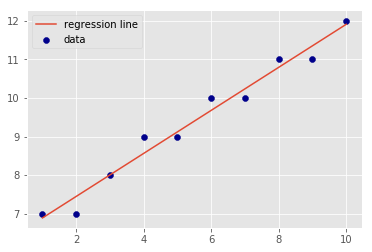

In [2]:
def calc_slope(xs,ys):
    slope = (xs.mean() * ys.mean() - (xs * ys).mean()) / ((xs.mean())**2 - (xs**2).mean())
    return slope

def best_fit(xs,ys):
    slope = calc_slope(xs,ys)
    b = ys.mean() - (slope * xs.mean())
    return (slope, b)

def reg_line (m, b, xs):
    X = []
    Y = []
    for i in xs:
        X.append(i)
        Y.append((m * i) + b)
    return X,Y

def sq_err(ys_a, ys_b):
    """
    input
    y_a : regression line
    y_b : mean line
    
    return
    squared error between regression and true line (ss_tot)
    """
    return ((ys_a - ys_b)**2).sum()

def r_squared(ys_real, ys_predicted):
    """
    input
    ys_real: real values
    ys_predicted: regression values
    
    return
    r_squared value
    """
    return (1 - (sq_err(ys_real, ys_predicted) / sq_err(ys_real, ys_real.mean())))

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

m, b = best_fit(X,Y)
X_reg, Y_reg = reg_line(m,b,X)
r2 = r_squared(Y, Y_reg)
print('Basic Regression Diagnostics')
print('----------------------------')
print('Slope:',round(m,2))
print('Y-Intercept:',round(b,2))
print('R-Squared:',round(r2,2))
print('----------------------------')
print('Model:','Y =',round(m,2),'* X +',round(b,2))

plt.scatter(X,Y,c='darkblue', label='data')
plt.plot(X_reg, Y_reg, label='regression line')
plt.legend()
plt.show()

In [3]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

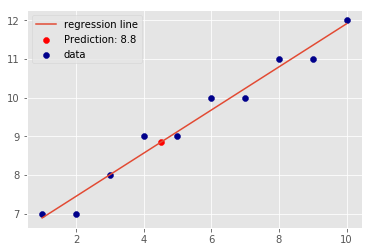

In [4]:
# Make prediction using given value and visualize on the scatter plot
new_x = 4.5
predicted_y = (m * new_x) + b

plt.scatter(new_x, predicted_y,c='red', label=f'Prediction: {round(predicted_y,1)}')
plt.scatter(X,Y,c='darkblue', label='data')
plt.plot(X_reg, Y_reg, label='regression line')
plt.legend()
plt.show()

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

In [5]:
import pandas as pd
df = pd.read_csv('heightWeight.csv')

In [12]:
def run(X,Y, new_x=None):
    m, b = best_fit(X,Y)
    X_reg, Y_reg = reg_line(m,b,X)
    r2 = r_squared(Y, Y_reg)
    
    print('Basic Regression Diagnostics')
    print('----------------------------')
    print('Slope:',round(m,2))
    print('Y-Intercept:',round(b,2))
    print('R-Squared:',round(r2,2))
    print('----------------------------')
    print('Model:','Y =',round(m,2),'* X +',round(b,2))
    
    plt.scatter(X,Y,c='darkblue', label='data')
    plt.plot(X_reg, Y_reg, label='regression line')
    plt.xlabel('Height')
    plt.ylabel('Weight')
   
    if new_x != None:
        new_y = (m * new_x) + b
        plt.scatter(new_x, new_y,c='red', label=f'Prediction: {round(new_y,1)}')
        print('Predicted Y:', round(new_y,1))
        
    plt.legend()
    plt.show()

Basic Regression Diagnostics
----------------------------
Slope: 5.54
Y-Intercept: -204.48
R-Squared: 0.96
----------------------------
Model: Y = 5.54 * X + -204.48
Predicted Y: 183.2


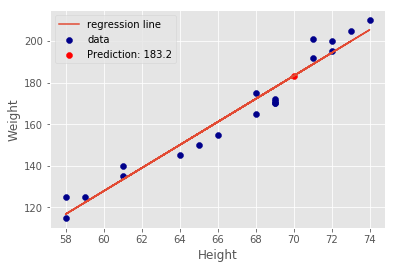

In [15]:
run(df['height'],df['Weight'],70)

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 